<h1>Lab 4</h1> <br>
Max Wang

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import random
import pandas


In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')
data = np.array(hf.get('data'))

<h2>Problem 1</h2>

<h3>1a.</h3> 

In [74]:
data_table = pandas.DataFrame(data).T
data_table.columns = ['Time (gps)', 'Solar Phase(deg)', 'Earth Longitude(deg)', 'Particle Counts']

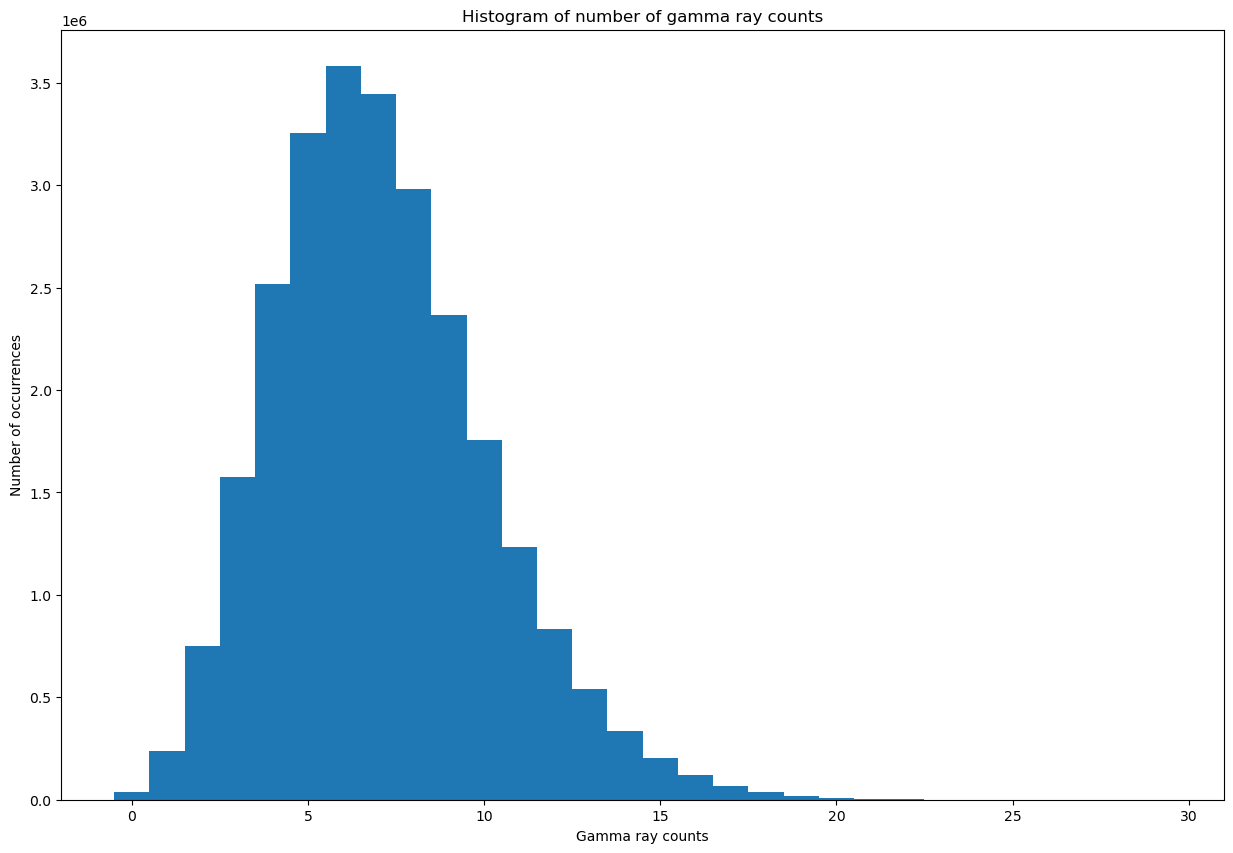

In [75]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
ax.set_title('Histogram of number of gamma ray counts')
ax.hist(data_table['Particle Counts'], bins=np.arange(0, data_table['Particle Counts'].max()+1), align='left')
ax.set_xlabel('Gamma ray counts')
ax.set_ylabel('Number of occurrences')
plt.show()

The overall distribution of the gamma ray particles seem to follow a Possion Distribution, <br>
$P(x)= ((\lambda ^ x) * e ^ {-\lambda})  / x! $ , where x is the number of counts and  <br>
$\lambda $ is the expected number of counts in the time interval.

In [76]:
mean = np.mean(data_table['Particle Counts'])
mean

7.09730524315952

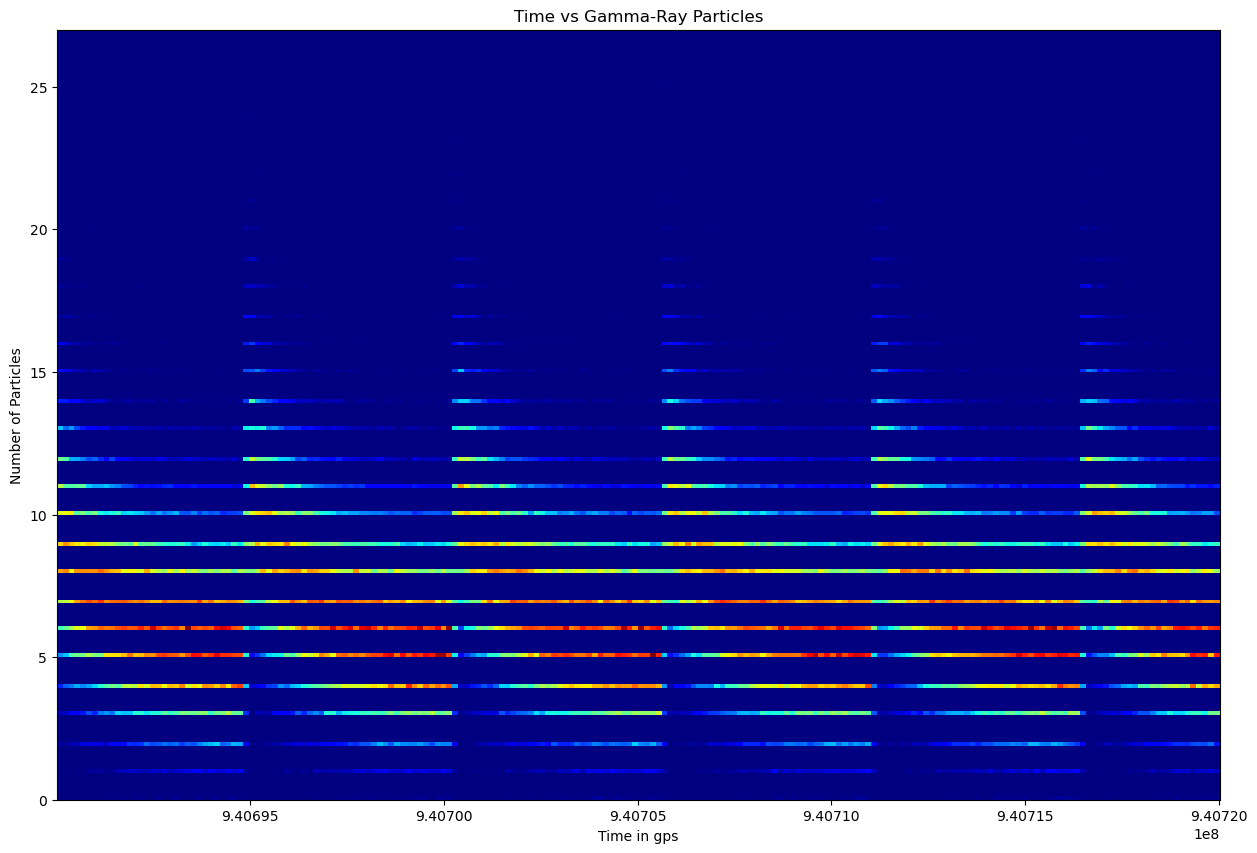

In [77]:
numpoints = 300000
startpoint = 100000

plt.hist2d(data[0,startpoint - 1:startpoint + numpoints - 1], data[3,startpoint - 1:startpoint + numpoints - 1],bins= 200, cmap = plt.cm.jet)
plt.title("Time vs Gamma-Ray Particles")
plt.xlabel("Time in gps")
plt.ylabel("Number of Particles")
plt.show()

This is a plot of the time (gps seconds) versus the particle counts from the gamma-ray satelite. <br>
The start of the data is chose to be on the 100,000th point, and the next 300,000 points of data <br>
is plotted. 

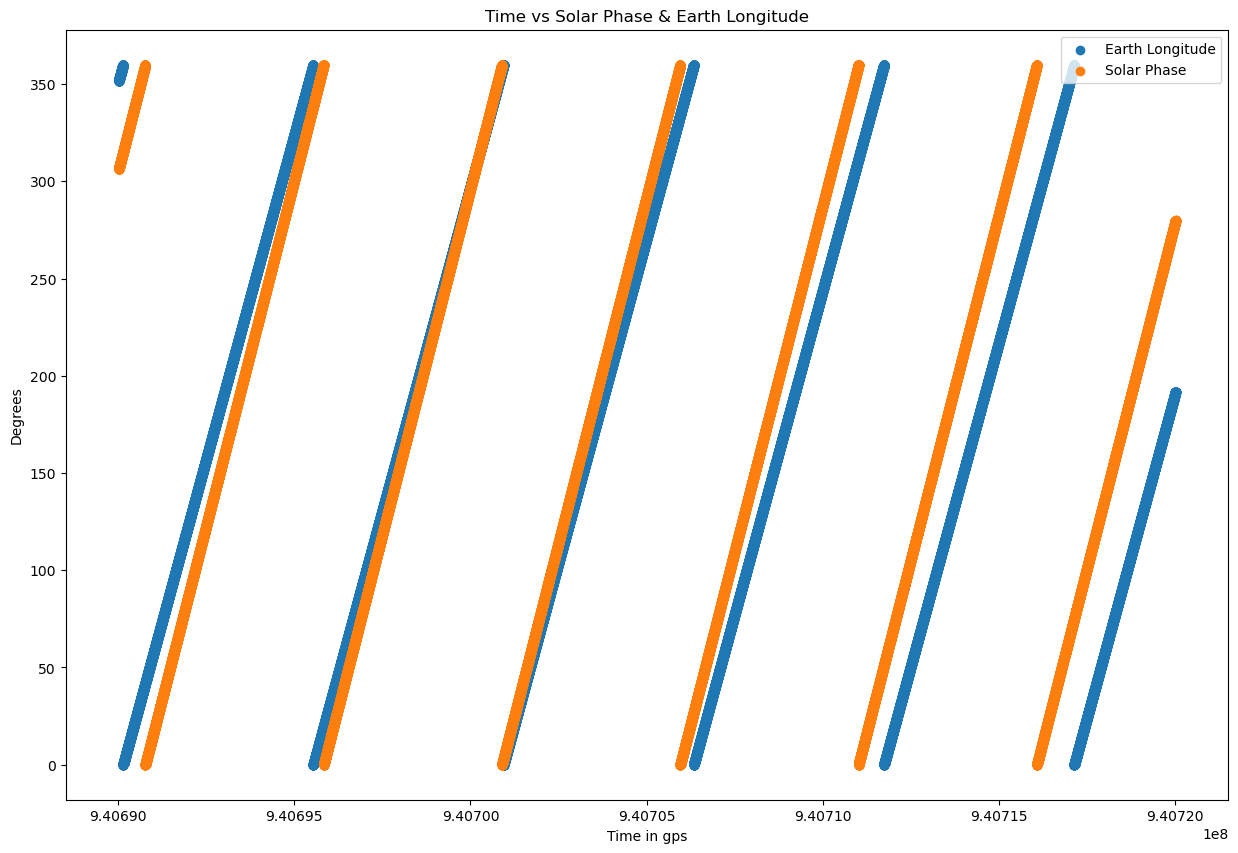

In [78]:
plt.scatter(data[0,startpoint - 1:startpoint + numpoints - 1], data[2,startpoint - 1:startpoint + numpoints - 1], label='Earth Longitude')
plt.scatter(data[0,startpoint - 1:startpoint + numpoints - 1], data[1,startpoint - 1:startpoint + numpoints - 1], label='Solar Phase')
plt.title("Time vs Solar Phase & Earth Longitude")
plt.xlabel("Time in gps")
plt.ylabel("Degrees")
plt.legend()
plt.show()

The second plot shows the time versus the solar phase (orange lines) <br>
and the Earth logitude (blue lines). From the two lines plotted versus <br>
time, they solar phase and the earth logitude are not in sync with each <br>
other, with the phase of the solar phase being shorter than the Earth <br>
longitude.

<h3>1b.</h3> 

The background seem to be contaminated, as it is not constant during the time period. <br>
It seems to be following a time period, which is the rotation of the satelite around<br>
the orbit. From the Time vs Gamma Ray particle graph, it seems to be following an <br>
exponential decay, and because the particle count change over count, a single probability <br>
distribution would not fit well. In order to find what cause the background to change, <br>
plots of the total data of the solar phase and Earth longitude data are plotted with the <br>
particle count. 

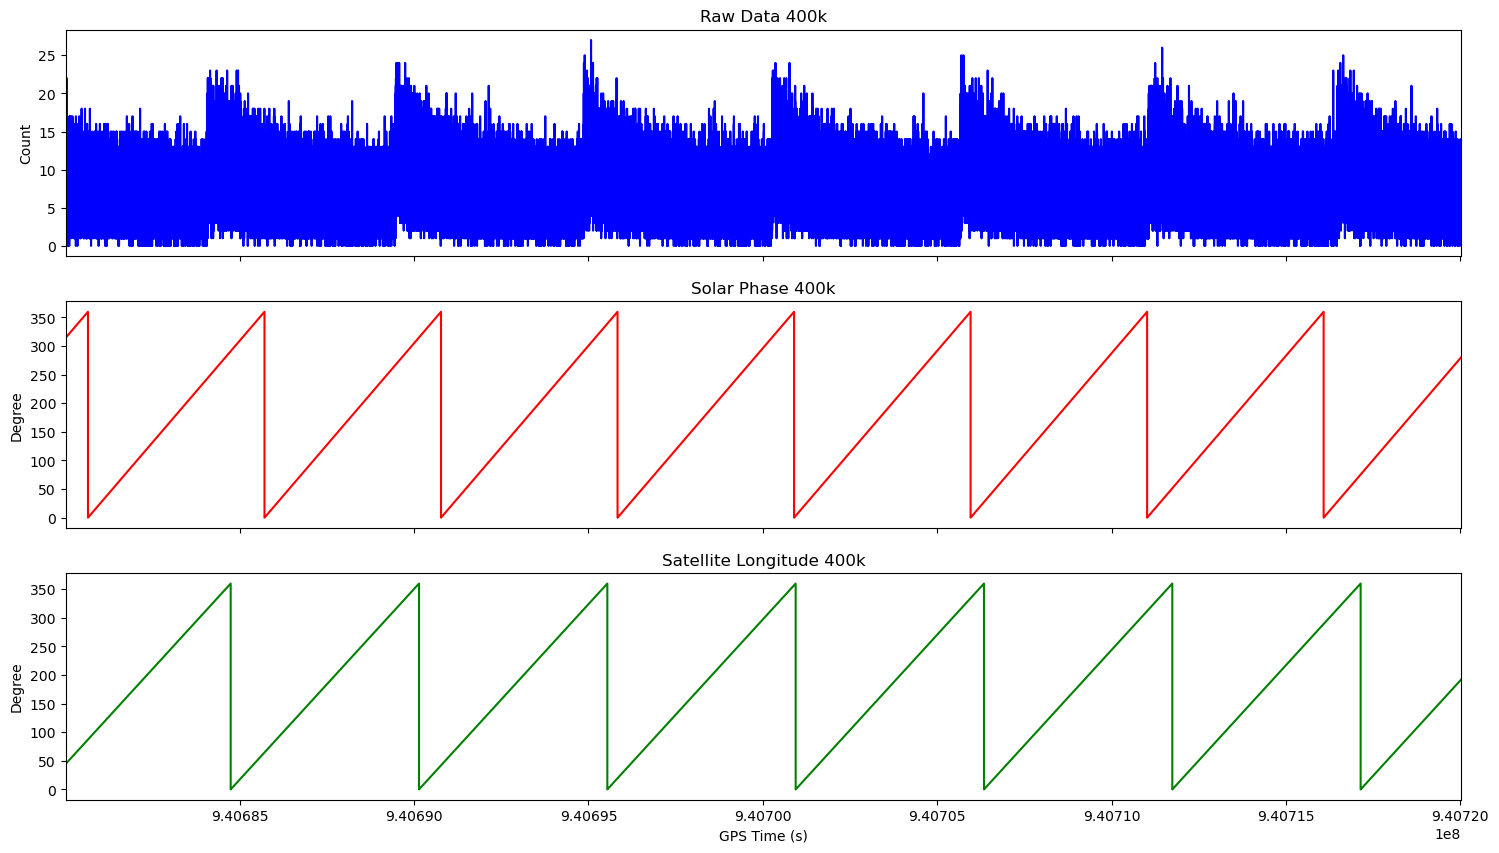

In [83]:
fig,ax = plt.subplots(3,1,figsize=(18, 10), sharex = True)
ax[0].set_title("Raw Data 400k")
ax[0].set_ylabel("Count")
ax[0].plot(data[0][0:400000], data[3][0:400000], color = 'b')
ax[0].set_xlim(data[0][0], data[0][400000])
ax[1].set_title("Solar Phase 400k")
ax[1].set_ylabel("Degree")
ax[1].plot(data[0][0:400000], data[1][0:400000], color = 'r')
ax[1].set_xlim(data[0][0], data[0][400000])
ax[2].set_title("Satellite Longitude 400k")
ax[2].set_ylabel("Degree")
ax[2].set_xlabel("Time in gps")
ax[2].plot(data[0][0:400000], data[2][0:400000], color = 'g')
ax[2].set_xlim(data[0][0], data[0][400000])
plt.show()

From the above graph, it seems like there is no coorelation between the solar phase with the data, but there is<br>
a coorelation with the Earth Longitude with the satellite, which means that the contaimination of the background <br>
could be caused by the longitude location of the satellite. It also can be seen from the graph that the period between <br>
each "spike" is about 5400 seconds, which is 90 minutes, the time it takes for the satellite to travel around Earth <br>
one time. It seems like when the satellite moves around the 330 degress, there is always a peak in the particle count. <br>

<h3>1c.</h3>

Because there is a correlation between the satellite moving along the 330 degree position with particle peak <br>
as identified above in part b, I chose to clean out the raw data so that the particle count around the 330 <br>
degrees mark is removed, in which the goal is to create a good model of the background with less contamination. 

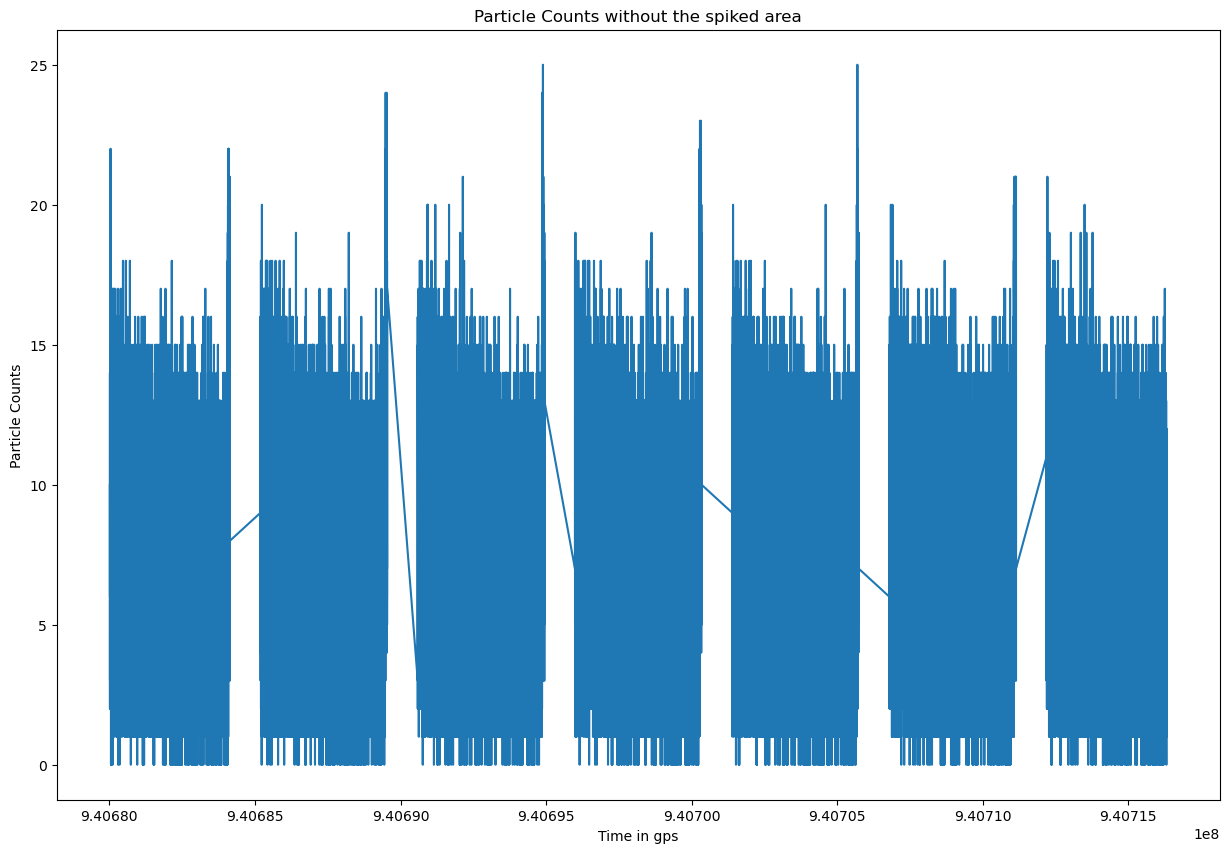

In [98]:
no_spike_filter = (data[2] > 30) & (data[2] < 320)
gps_time_no_spike = data[0][no_spike_filter]
raw_data_no_spike = data[3][no_spike_filter]
gps_time_spike = data[0][np.invert(no_spike_filter)]
raw_data_spike = data[3][np.invert(no_spike_filter)]
plt.title("Particle Counts without the spiked area")
plt.xlabel('Time in gps')
plt.ylabel('Particle Counts')
plt.plot(gps_time_no_spike[0:numpoints], raw_data_no_spike[0:numpoints]);

In [99]:
new_mean = np.mean(raw_data_no_spike)
newmean

6.390145650493262

The spiked data corresponds to the satellite travelling around the 330 degrees, <br>
which is why I chose to remove the data that is above 320 degrees and data <br>
below 40 degrees. leaving the rest of the data untouched. Below is the plot of<br>
the distribution of the data without the area that is spiked, and the probability <br>
density of the individual counts of particles. The new mean of the raw data is <br>
about 6.39, so a Poisson distribution with the mean of 6.39 is also plotted for <br>
a comparison of the new model.

Text(0, 0.5, 'Probability Density')

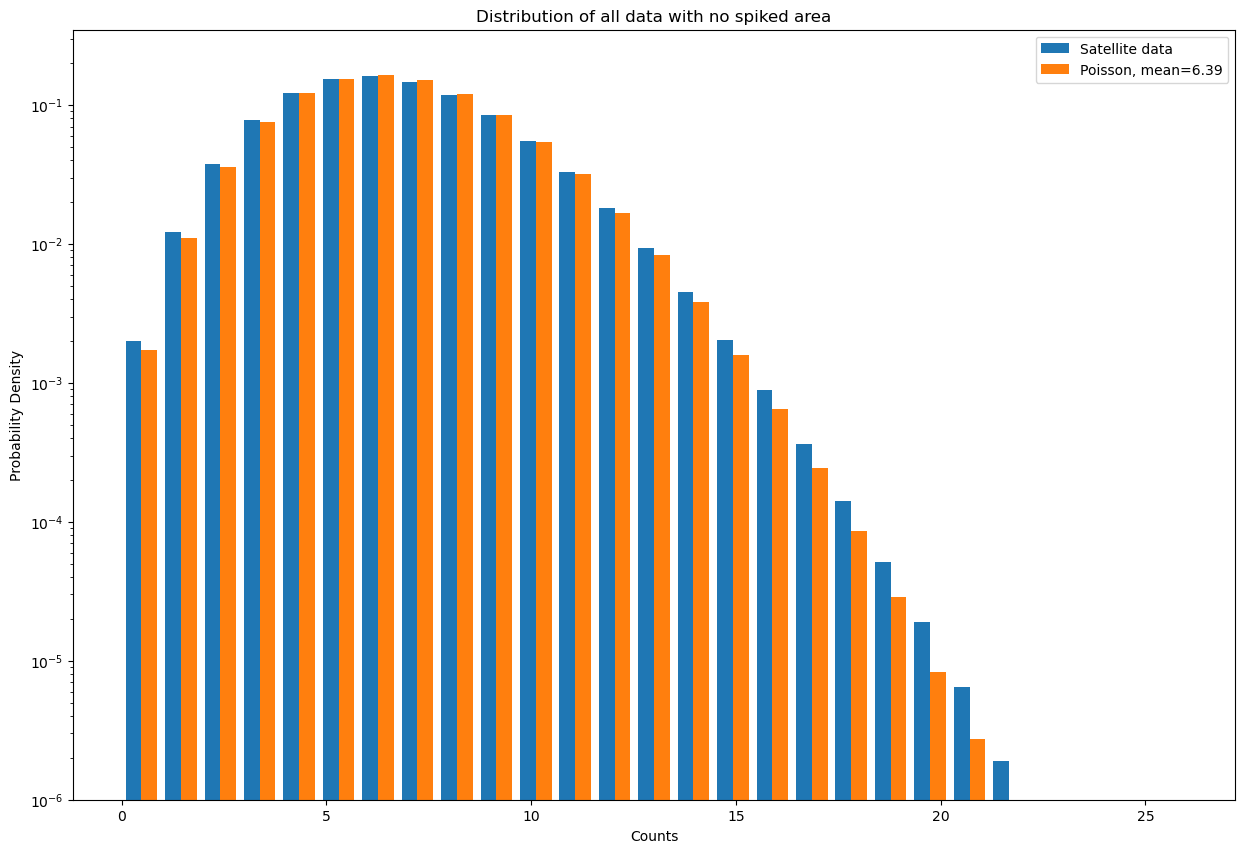

In [97]:
vals = stats.poisson(new_mean).rvs(len(raw_data_no_spike))
plt.hist([raw_data_no_spike, vals], bins=27, density=True)
plt.yscale('log')
plt.ylim(1e-6, None)
plt.legend(['Satellite data', f"Poisson, mean={new_mean.round(2)}"])
plt.title("Distribution of all data with no spiked area")
plt.xlabel('Counts')
plt.ylabel('Probability Density')

<h3>1d.</h3>

The number of counts from the sample of 100-millisecond gamma ray backgrounds needed in order  <br>
to be significant will be calculated using the cdf function. Since it is a poisson distribution,<br> 
we will do

In [3]:
stats.poisson(6.39).ppf(stats.norm.cdf(5))

23.0

so the number of count needed for a 5 sigma signifiance will be 23.

<h2>Problem 2</h2>

<h3>2a.</h3> 

In [108]:
hf2 = h5py.File('images.h5', 'r')
# Get keys for the different data
hf2.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [109]:
first_img = np.array(hf2.get('image1'))
img_data = np.array(hf2.get('imagestack'))

<h3>2b.</h3> 

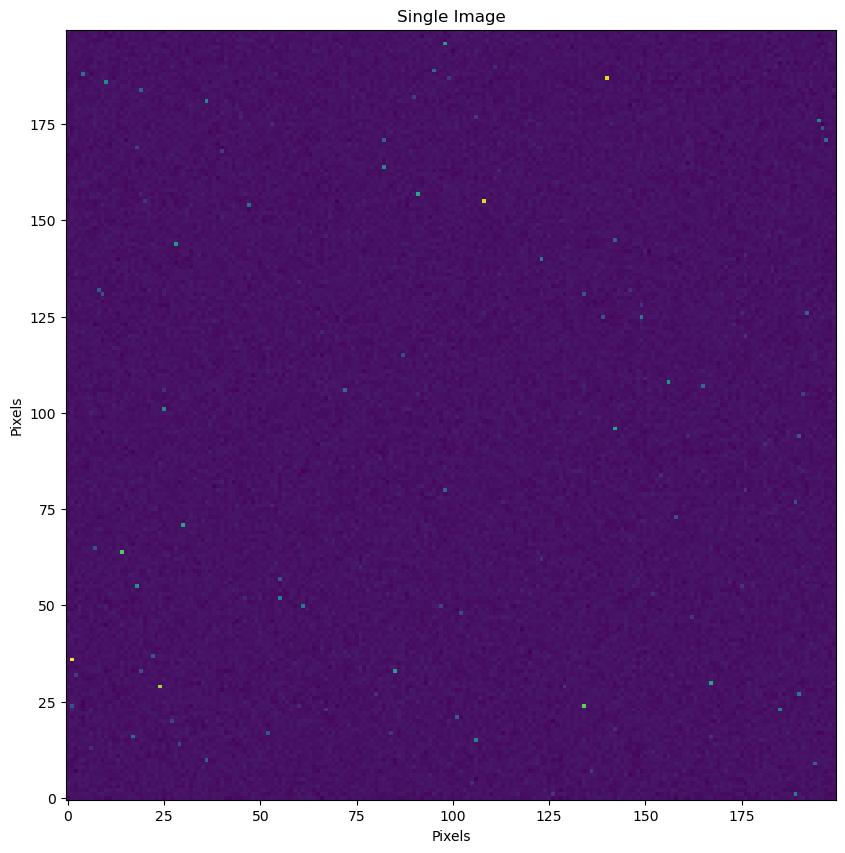

In [110]:
plt.figure(figsize=(10,10))
plt.imshow(first_img, origin='lower')
plt.title('Single Image')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

This is the first image from the telescope, and from this image, it looks like the <br>
background is fairly constant, and the only contaimination are from the stars. <br>
In order to look for the faintest stars, it is better to sum up all of the pictures <br>
and analyze the average from the ten images, it will mlower the background spread <br>
and easier to distinguish the faint stars. 

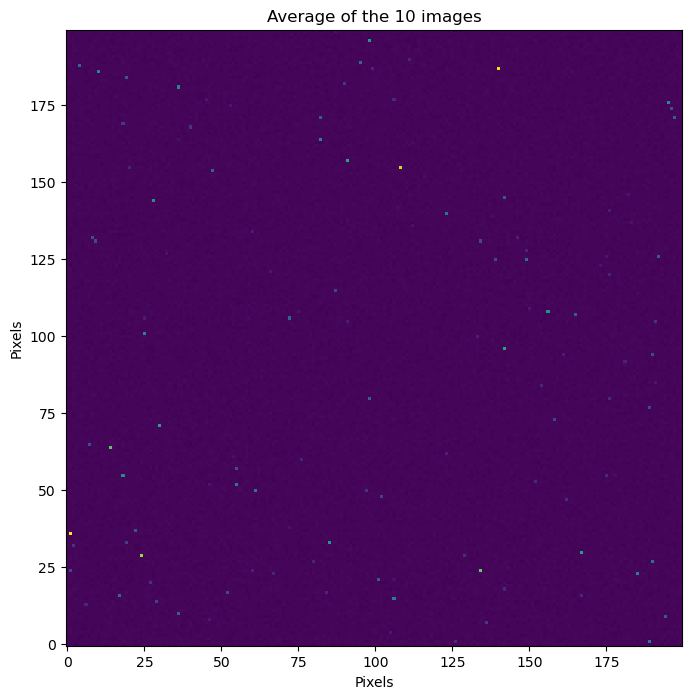

In [113]:
#plotting an average of the images
avg_image = np.sum(img_data, axis=2)/10

plt.figure(figsize=(8, 8))
plt.imshow(avg_image, origin='lower')
plt.title('Average of the 10 images')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

The sum of all of the rows and colomn pixels are also plotted below:

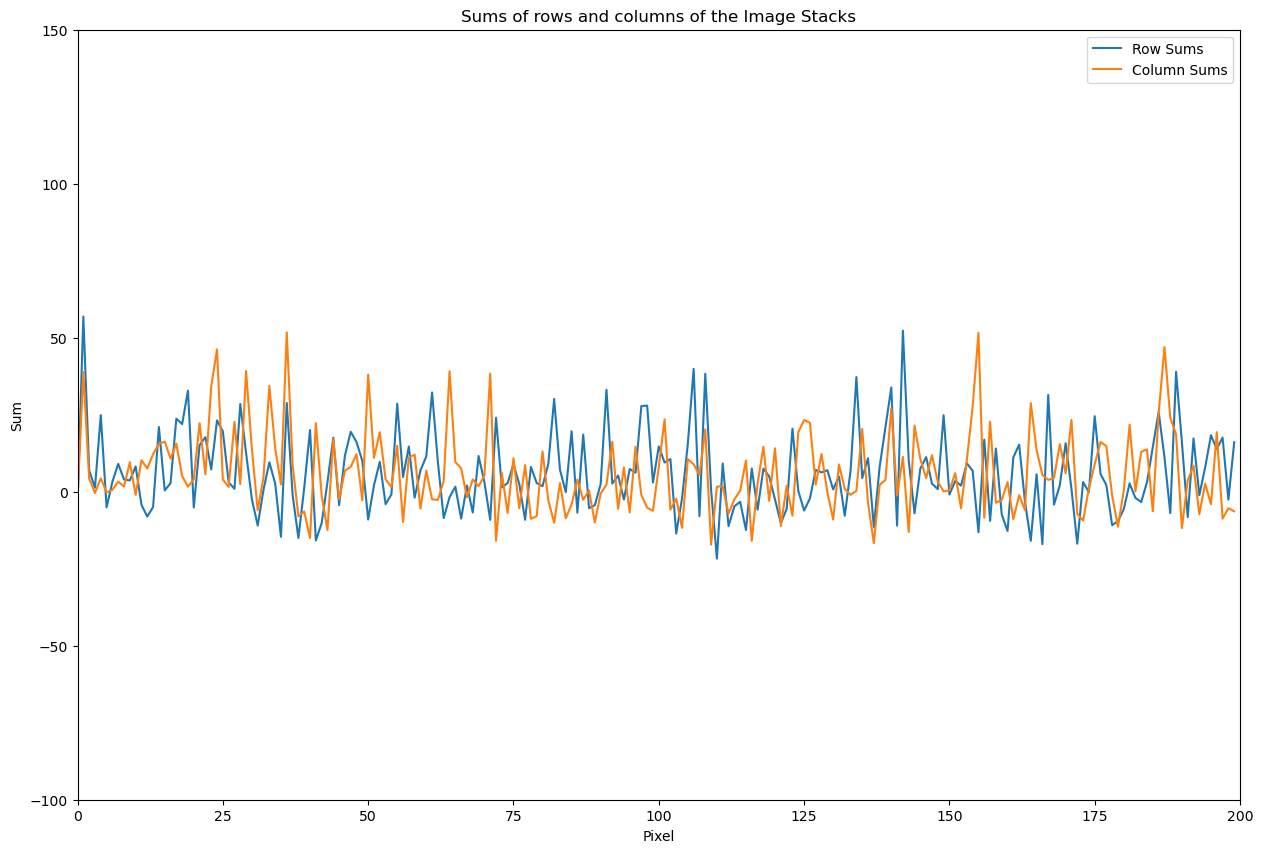

In [114]:
#Sum of all the rows and coloum of the image stacks
rows_sum = np.sum(img_data[:, :, 0], 0)
cols_sum = np.sum(img_data[:, :, 0], 1)

#Plot the sums
plt.figure(figsize=(15, 10))
plt.plot(np.arange(0, 200), rows_sum)
plt.plot(np.arange(0, 200), cols_sum)

plt.title('Sums of rows and columns of the Image Stacks')
plt.legend(['Row Sums', 'Column Sums'])
plt.xlabel('Pixel')
plt.ylabel('Sum')
plt.xlim(0, 200)
plt.ylim(-100, 150)

plt.show()

From the comparison, it loosk like the background noise for both rows and coloum <br>
pixels are fairly consistant, and from the average of the ten image stacks, <br>
the background noise is reduced significantly, and the more faint stars are more <br>
visible.

The mean pixel strentgh of the average of the 10 stack images is

In [115]:
mean=np.mean(avg_image)
mean

0.03344376540373896

And the standard deviation of the pixel strentgh of the average of the 10 stack images is

In [116]:
std=np.std(avg_image)
std

0.8359686847601935

Even though the average of the ten image stacks has less noise in <br>
the background, there are still a lot of pixels that are way too <br>
strong as outliers that will affect the finding of the fainter stars. <br>
So My plan to find the background distribution is to remove all <br>
of the signals that are greater than 5 sigma of the mean. I chose <br>
to do this process three times to have a lower chance in having outliers<br>
from the background.

In [117]:
newavg = np.sum(image_stack, axis=0)/10
for i in range(3):
    newavg = newavg[np.where((newavg<=(mean+std*5))&(newavg>=(mean-std*5)))]
    mean = np.mean(newavg)
    std = np.std(newavg)

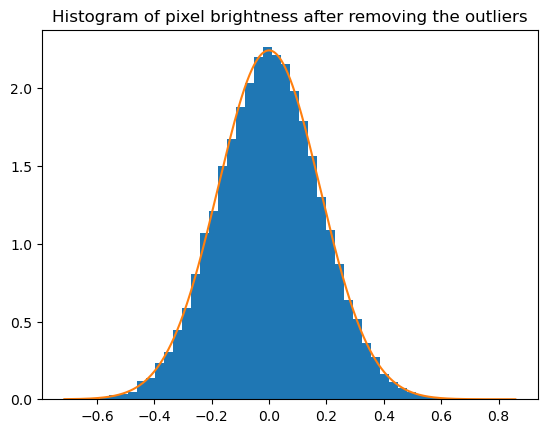

In [118]:
x = np.linspace(clip.min(), clip.max(), 10000)
fig, ax = plt.subplots(1, 1)
ax.set_title('Histogram of pixel brightness after removing the outliers')
ax.hist(clip, bins = 50, density=True)
ax.plot(x, stats.norm.pdf(x, mean, std), label = 'Normal fit')

It looks like the distribution is fairly normal, so a Gaussian distribution with the mean 

In [119]:
mean

-0.0001532093069965201

and a distribution of 

In [120]:
std

0.17777284206202734

would fit the model quite well. 

<h3>2c.</h3> 

In [121]:
signal = mean+5*std
signal

0.8887110010031403

It looks like the signal that has greater than 5 sigma would need <br>
strength greater than 0.889

In [122]:
star_signal = avg_image[np.where(avg_image>=0.8887)]

In [123]:
num_stars = len(star_signal)
num_stars

125

The number of stars that passes the 5 sigma threshold are 125.

In [126]:
faint_stars = np.sum(img_data, axis=2)/10
faint_stars[faint_stars >= 0.8887] = 100

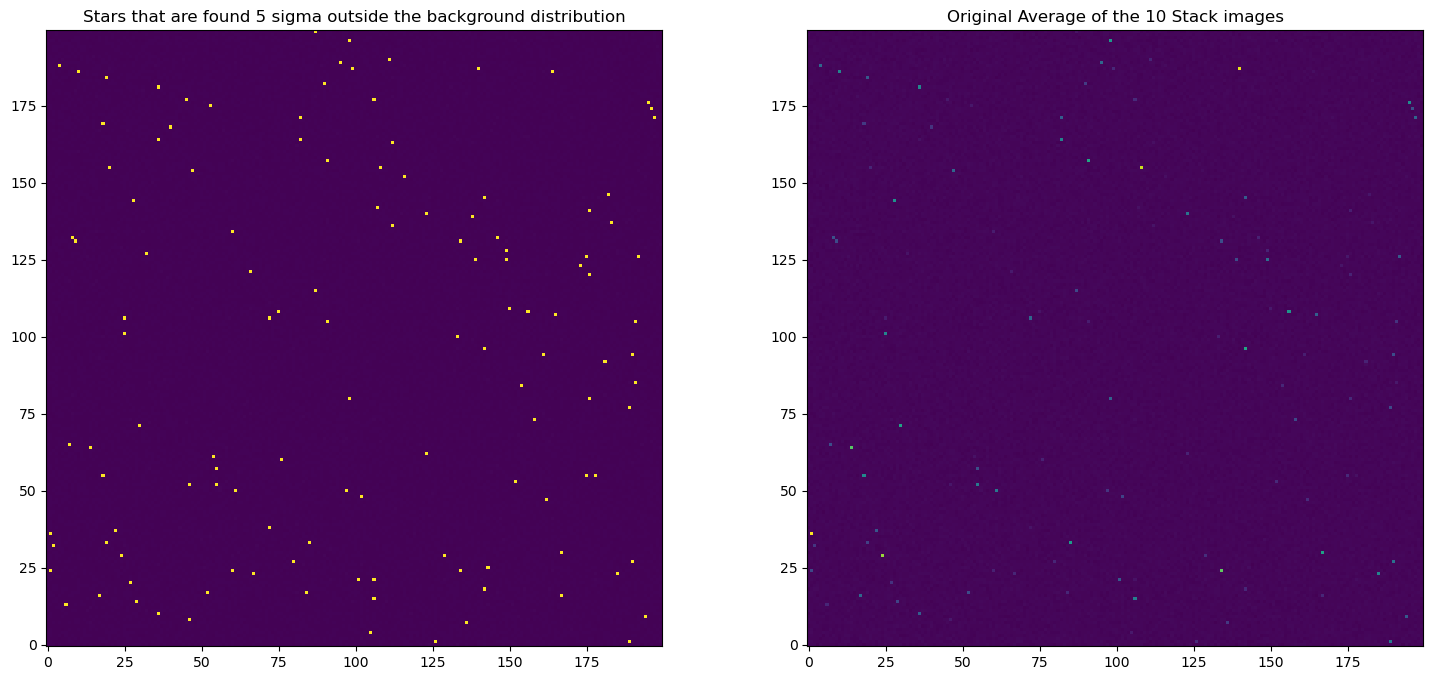

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].set_title('Stars that are found 5 sigma outside the background distribution')
ax[0].imshow(faint_stars, origin='lower')
ax[1].set_title('Original Average of the 10 Stack images')
ax[1].imshow(avg_image, origin='lower')

The faint stars are found and labeled in yellow as the signal are greater than 0.889<br>
which means they are 5 sigma away from the mean of the background distribution. 

<h3>2d.</h3> 

Even though the data are the same, which are the 10 stack images from the<br>
telescope, the background distribution and what outliers we choose to remove <br>
from the original dataset are the ones deciding the background distribution. <br>
For the fainter stars, I chose to average out the data from the 10 images, <br>
but for a supernova that is only able to be observed in single images, the <br>
background distribution will be different than the average.